In [1]:
# os functions
import os

# local files
from env import host, user, password
import wrangle as w

# df manipulations
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from math import sqrt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

np.random.seed(123)

In [2]:
# 1. Load the tips dataset from either pydataset or seaborn
from pydataset import data
tips = data('tips')

In [3]:
# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill

baseline = tips.tip.mean()
tips['baseline'] = baseline

model = LinearRegression().fit(tips[['total_bill']], tips.tip)
tips['yhat'] = model.predict(tips[['total_bill']])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [4]:
# 3. Plot the residuals for the linear regression model that you made.

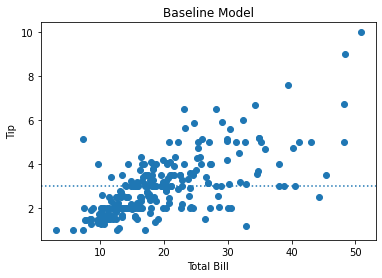

In [5]:
plt.scatter(tips.total_bill, tips.tip)
plt.axhline(baseline, ls=':')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Baseline Model')
plt.show()

In [6]:
tips['residual_baseline'] = tips['baseline'] - tips['tip']

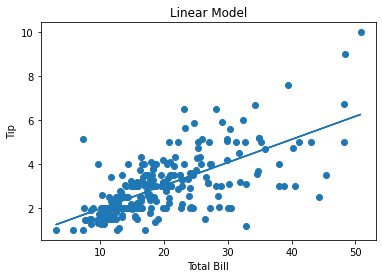

In [7]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, tips.yhat)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Model')
plt.show()

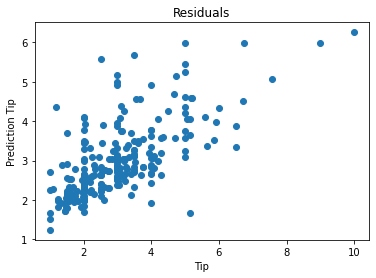

In [8]:
plt.scatter(tips.tip, tips.yhat)
plt.xlabel('Tip')
plt.ylabel('Prediction Tip')
plt.title('Residuals')
plt.show()

In [9]:
tips['residual'] = tips['yhat'] - tips['tip']

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual_baseline,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.988279,1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,1.338279,0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.501721,-0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.311721,0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.611721,-0.107178


In [11]:
# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error,
# and root mean squared error for your model.

In [12]:
# Sum of Squared Errors
SSE = mean_squared_error(tips.tip, tips.yhat)*len(tips)
SSE_base = mean_squared_error(tips.tip, tips.baseline)*len(tips)

# Explained Sum of Squares, total sum of squares
ESS = sum((tips.yhat - tips.tip.mean())**2)
ESS_base = sum((tips.baseline - tips.tip.mean())**2)

TSS = ESS + SSE
TSS_base = ESS_base + SSE_base

In [13]:
# Mean squared error and root mean squared error
MSE = mean_squared_error(tips.tip, tips.yhat)
MSE_base = mean_squared_error(tips.tip, tips.baseline)

RMSE = sqrt(MSE)
RMSE_base = sqrt(MSE)

In [14]:
# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model 
# (a model that always predicts the average tip amount)

In [15]:
# Done with model above

In [16]:
# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors
# for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
def metric_comparison_reg(tips):
    '''
    This function takes in a dataframe and returns regression metrics SSE, MSE, and RMSE for comparison. 
    '''
    # Creation of model and baseline dataframes that contains metrics
    df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns=['metric'])
    df_baseline = pd.DataFrame(np.array(['SSE_baseline', 'MSE_baseline', 'RMSE_baseline']), columns=['metric'])
    
    ### Calculation of metrics
    # Sum of Squared Errors
    SSE = mean_squared_error(tips.tip, tips.yhat)*len(tips)
    SSE_base = mean_squared_error(tips.tip, tips.baseline)*len(tips)
    # Mean squared error and root mean squared error
    MSE = mean_squared_error(tips.tip, tips.yhat)
    MSE_base = mean_squared_error(tips.tip, tips.baseline)
    # Root mean squared error
    RMSE = sqrt(MSE)
    RMSE_base = sqrt(MSE_base)
    
    # Create error column with metrics assigned
    df_eval['model_error'] = np.array([SSE, MSE, RMSE])
    df_baseline['model_error'] = np.array([SSE_base, MSE_base, RMSE_base])
    
    # Print the dataframes for comparison
    print(df_eval)
    print(df_baseline)

In [18]:
metric_comparison_reg(tips)

  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


In [19]:
# 7. What is the amount of variance explained in your model?

In [20]:
evs = explained_variance_score(tips.tip, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [21]:
# 8. Is your model better than the baseline model?

The model performs better than the baseline in all of the measured metrics.

In [22]:
# 9. Creation of evaluate.py that contains a number of functions.

In [23]:
import evaluate

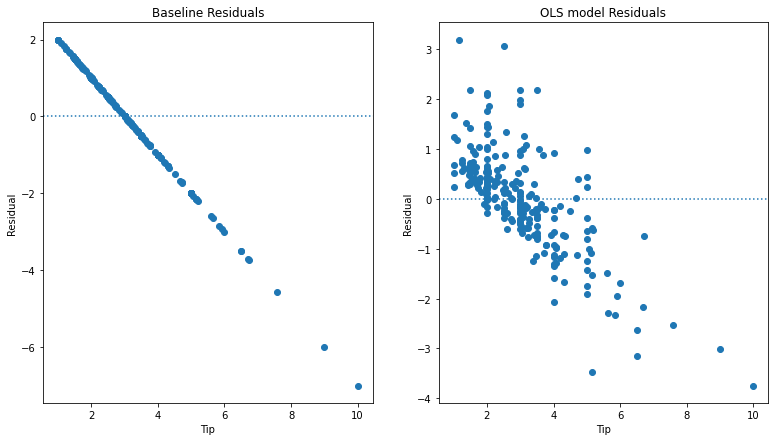

In [24]:
evaluate.plot_residuals(tips.tip, tips.yhat)

In [27]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(tips.tip, tips.yhat)
SSE, ESS, TSS, MSE, RMSE

(252.78874385077597,
 212.42373319840416,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

In [28]:
SSE_base, MSE_base, RMSE_base = evaluate.baseline_mean_errors(tips.tip)
SSE_base, MSE_base, RMSE_base

(465.21247704918085, 1.906608512496641, 1.3807999538298954)

In [26]:
# 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement.
# Take a look at regression metrics using evaluate.py functions to determine if model performs better than baseline.